In [1]:
import plotly
import plotly.graph_objs as go
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import datetime
import pickle
from sklearn.model_selection import train_test_split

In [2]:
path = r"../input/flu-classification/Flu Classification.csv"
df = pd.read_csv(path)
df.head(10)

,Diagnosis,InitialPCRDiagnosis,Age,Sex,Region,CommunityTransmission,NumberOfFamilyMembersInfected,neutrophil,neutrophilCategorical,serumLevelsOfWhiteBloodCell,...,Temperature,Hematocrit,ActivatedPartialThromboplastinTime,Fibrinogen,Urea,Fatigue,Monocytes,Basophil,Cancer,Thrombocytes
0,H1N1,NaN,67.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.111111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
1,H1N1,NaN,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,NaN,20.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,36.555556,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN
4,H1N1,NaN,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,NaN,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,NaN,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,NaN,60.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,38.166667,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
8,H1N1,NaN,46.0,F,NaN,NaN,NaN,NaN,NaN,NaN,...,38.611111,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN
9,H1N1,NaN,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df.iloc[0:1484,[0,2,3,25,31,32,33,34,35,36,41,46,49]]
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,NaN,NaN,Yes,Yes,NaN,No,NaN,38.111111,No,NaN
1,H1N1,29.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,H1N1,20.0,F,immuno,NaN,Yes,Yes,NaN,No,NaN,36.555556,Yes,NaN
4,H1N1,21.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,H1N1,22.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,H1N1,19.0,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,H1N1,60.0,M,"Renal Disease, athero",NaN,No,Yes,NaN,No,NaN,38.166667,No,NaN
8,H1N1,46.0,F,NaN,NaN,Yes,Yes,NaN,No,NaN,38.611111,No,NaN
9,H1N1,18.0,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df["Age"].fillna(0, inplace = True)
df["Temperature"].fillna(0, inplace = True)
df["Sex"].fillna("unknown", inplace = True)
df["RiskFactors"].fillna("unknown", inplace = True)
df["Diarrhea"].fillna("unknown", inplace = True)
df["Fever"].fillna("unknown", inplace = True)
df["ShortnessOfBreath"].fillna("unknown", inplace = True)
df["SoreThroat"].fillna("unknown", inplace = True)
df["NauseaVomitting"].fillna("unknown", inplace = True)
df["Fatigue"].fillna("unknown", inplace = True)
df["Cancer"].fillna("unknown", inplace = True)
df["Coughing"].fillna("unknown", inplace = True)
df.head(10)

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,H1N1,67.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.111111,No,unknown
1,H1N1,29.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
2,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
3,H1N1,20.0,F,immuno,unknown,Yes,Yes,unknown,No,unknown,36.555556,Yes,unknown
4,H1N1,21.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
5,H1N1,22.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
6,H1N1,19.0,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown
7,H1N1,60.0,M,"Renal Disease, athero",unknown,No,Yes,unknown,No,unknown,38.166667,No,unknown
8,H1N1,46.0,F,unknown,unknown,Yes,Yes,unknown,No,unknown,38.611111,No,unknown
9,H1N1,18.0,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,0.000000,unknown,unknown


In [5]:
df.Diagnosis = df.Diagnosis.astype("category").cat.codes
df.Sex = df.Sex.astype("category").cat.codes
df.RiskFactors = df.RiskFactors.astype("category").cat.codes
df.Diarrhea = df.Diarrhea.astype("category").cat.codes
df.Fever = df.Fever.astype("category").cat.codes
df.Coughing = df.Coughing.astype("category").cat.codes
df.ShortnessOfBreath = df.ShortnessOfBreath.astype("category").cat.codes
df.SoreThroat = df.SoreThroat.astype("category").cat.codes
df.NauseaVomitting = df.NauseaVomitting.astype("category").cat.codes
df.Fatigue = df.Fatigue.astype("category").cat.codes
df.Cancer = df.Cancer.astype("category").cat.codes
df.head()

,Diagnosis,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,1,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,1,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,1,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,1,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


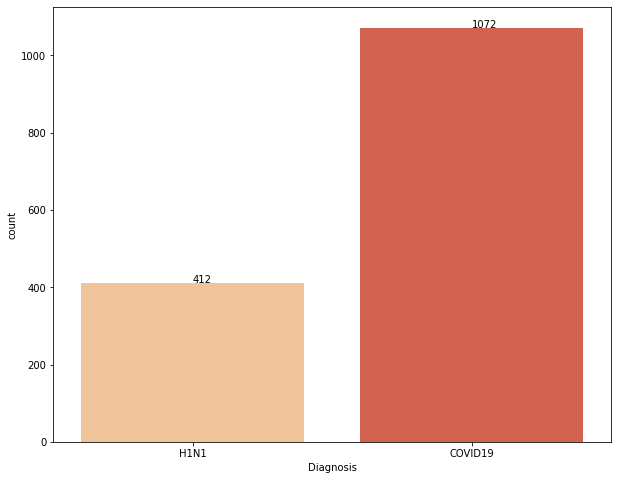

In [6]:
plt.figure(figsize=(10,8))
ax=sns.countplot(df['Diagnosis'], palette='OrRd')
ax.set_xticklabels(['H1N1','COVID19'])
for p in ax.patches:
    ax.annotate('{:d}'.format(p.get_height()), (p.get_x()+0.40, p.get_height()+1))

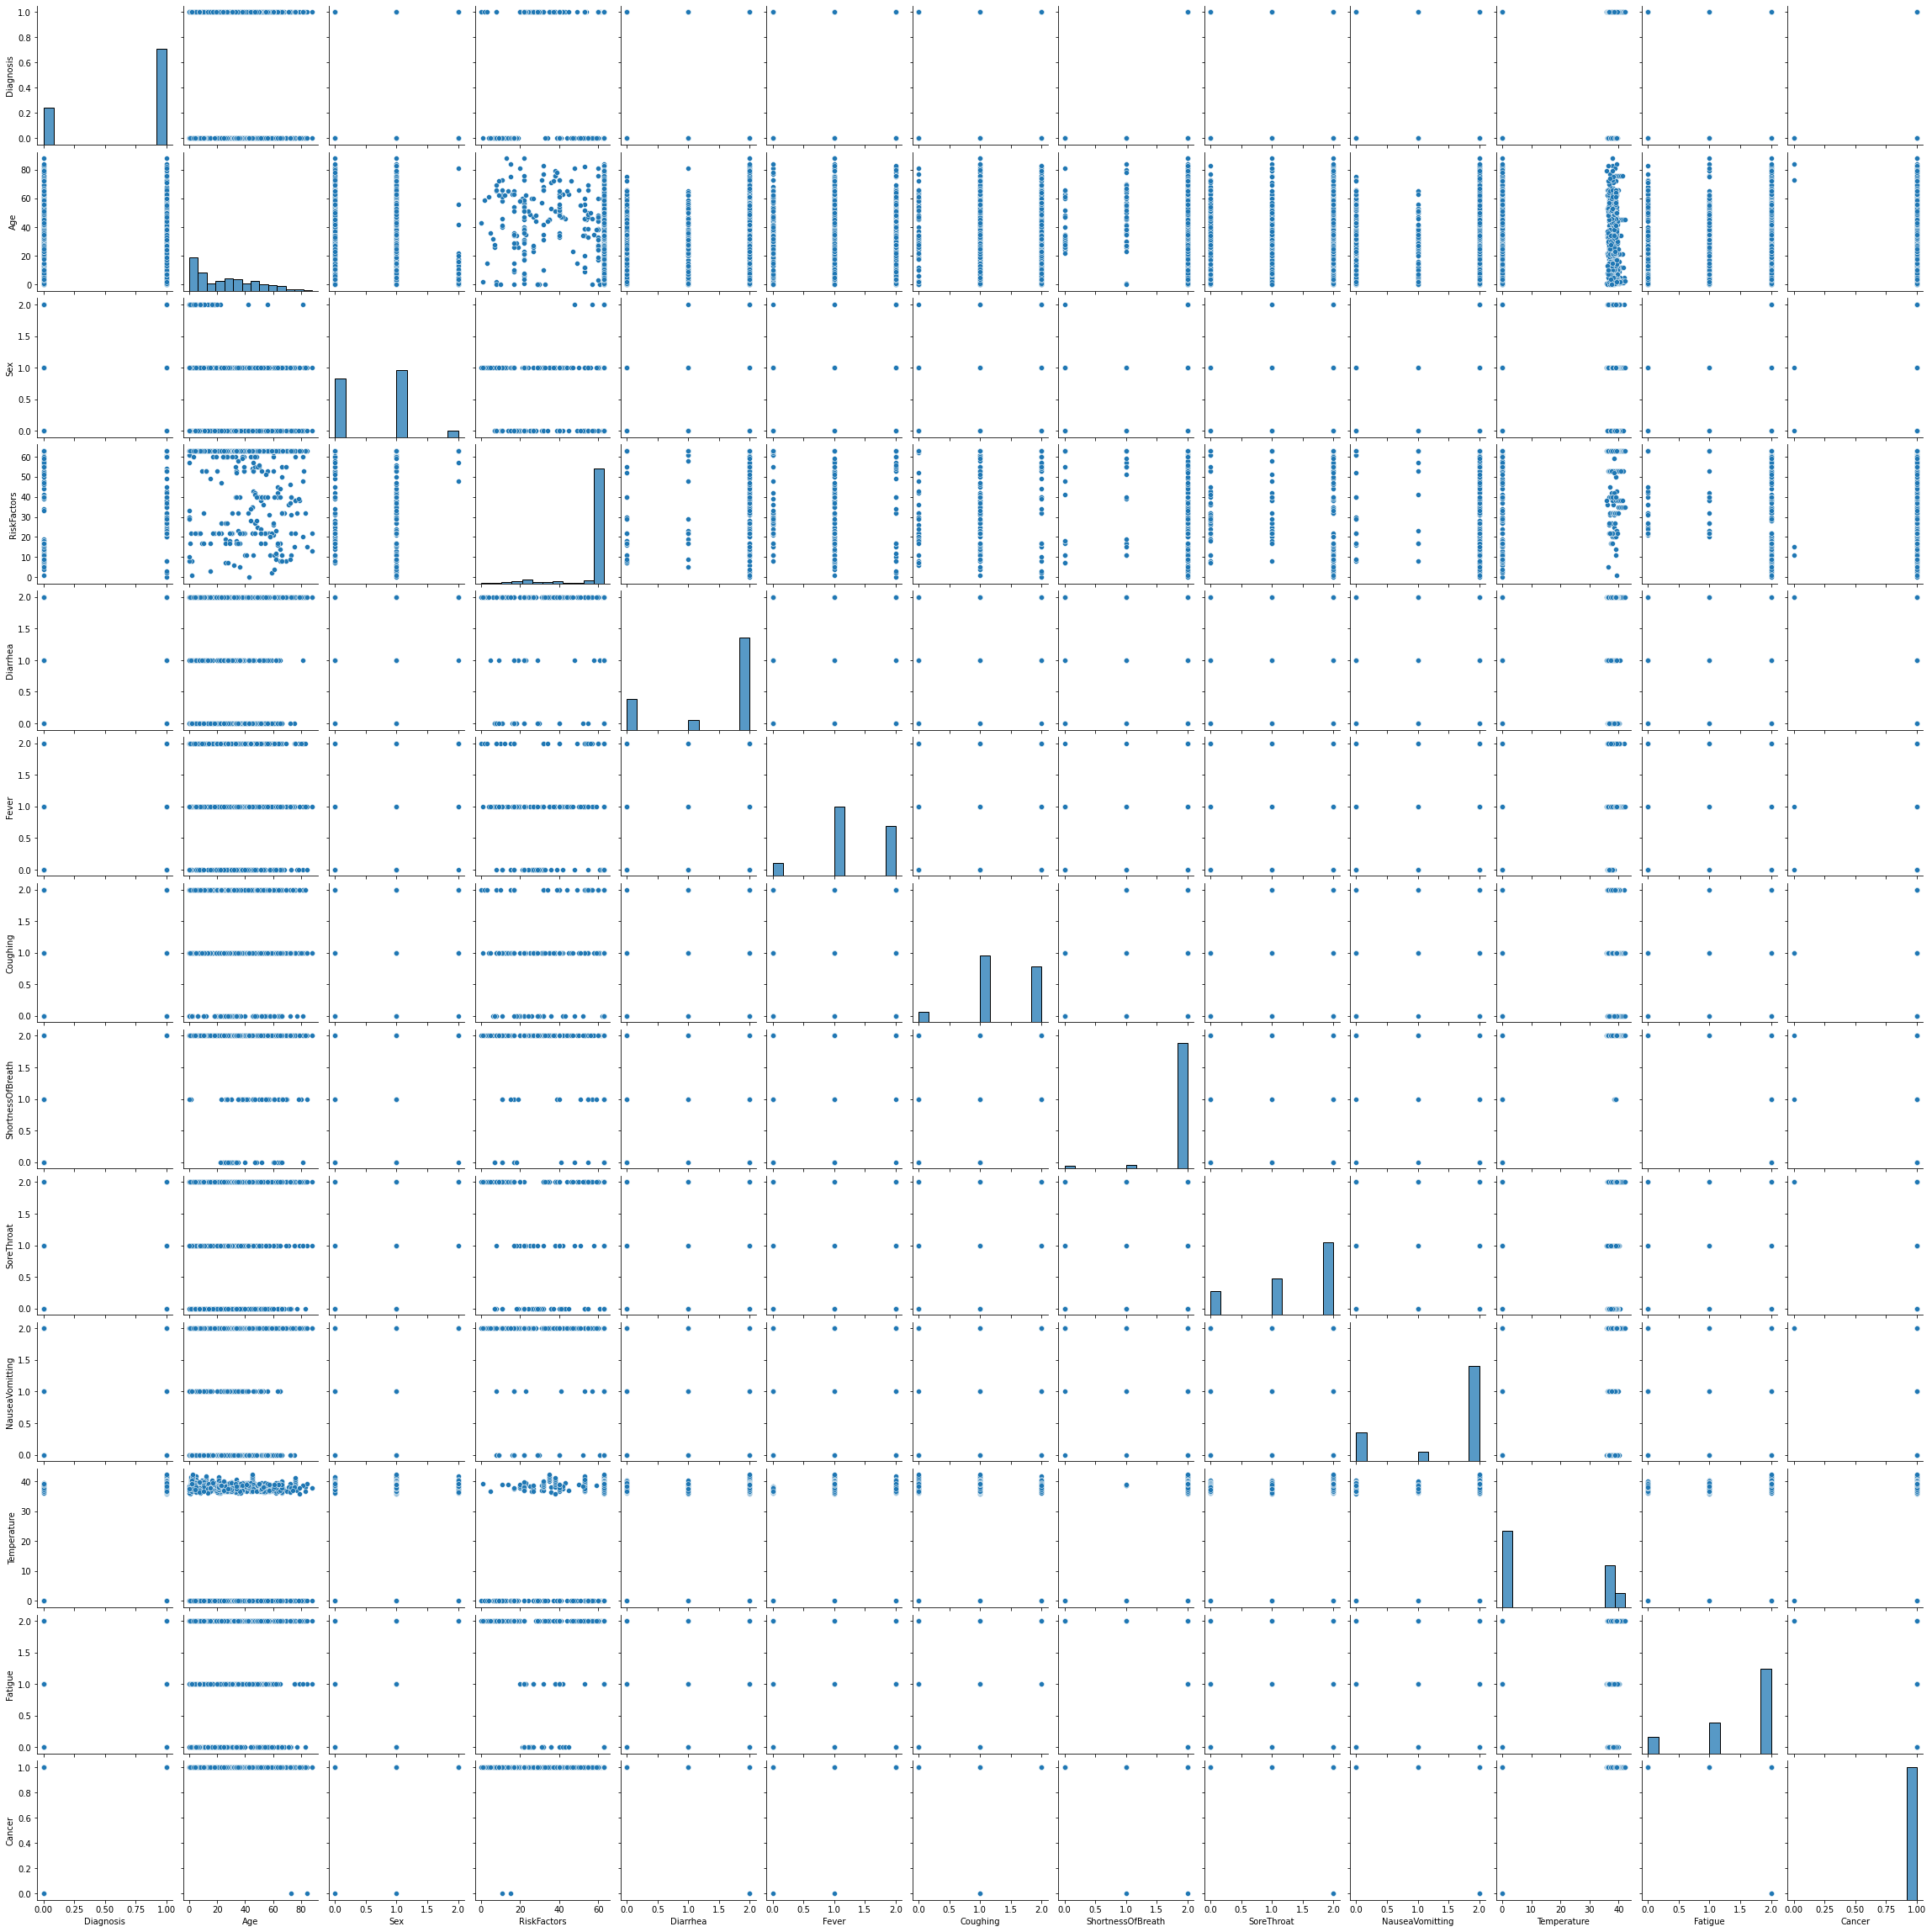

In [7]:
sns.pairplot(df)

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.tree import plot_tree
from timeit import default_timer as timer

In [9]:
x = df.iloc[:,1:]
x.head()

,Age,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Temperature,Fatigue,Cancer
0,67.0,0,63,2,1,1,2,0,2,38.111111,0,1
1,29.0,1,63,2,2,2,2,2,2,0.000000,2,1
2,22.0,0,63,2,2,2,2,2,2,0.000000,2,1
3,20.0,0,53,2,1,1,2,0,2,36.555556,1,1
4,21.0,1,63,2,2,2,2,2,2,0.000000,2,1


In [10]:
y = df.iloc[:,0]
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Diagnosis, dtype: int8

In [11]:
path = r"../input/training/Training Set.csv"
dfTrain = pd.read_csv(path)
dfTrain.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,5.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,13.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,0.0,0.000000,F,unknown,No,Yes,Yes,unknown,Yes,No,unknown,unknown,H1N1
3,26.0,39.000000,F,unknown,unknown,Yes,No,unknown,Yes,unknown,No,unknown,H1N1
4,44.0,0.000000,M,unknown,unknown,No,Yes,unknown,Yes,unknown,No,unknown,H1N1
5,10.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
6,57.0,38.500000,M,athero,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
7,4.0,37.000000,M,asthma,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
8,29.0,37.611111,M,unknown,No,No,Yes,unknown,Yes,No,Yes,unknown,H1N1
9,6.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1


In [12]:
dfTrain.Diagnosis = dfTrain.Diagnosis.astype("category").cat.codes
dfTrain.Sex = dfTrain.Sex.astype("category").cat.codes
dfTrain.RiskFactors = dfTrain.RiskFactors.astype("category").cat.codes
dfTrain.Diarrhea = dfTrain.Diarrhea.astype("category").cat.codes
dfTrain.Fever = dfTrain.Fever.astype("category").cat.codes
dfTrain.Coughing = dfTrain.Coughing.astype("category").cat.codes
dfTrain.ShortnessOfBreath = dfTrain.ShortnessOfBreath.astype("category").cat.codes
dfTrain.SoreThroat = dfTrain.SoreThroat.astype("category").cat.codes
dfTrain.NauseaVomitting = dfTrain.NauseaVomitting.astype("category").cat.codes
dfTrain.Fatigue = dfTrain.Fatigue.astype("category").cat.codes
dfTrain.Cancer = dfTrain.Cancer.astype("category").cat.codes

In [13]:
x_train = dfTrain.iloc[:,:-1]
x_train

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,5.0,0.000000,1,49,2,2,2,2,2,2,2,1
1,13.0,0.000000,1,49,2,2,2,2,2,2,2,1
2,0.0,0.000000,0,49,0,1,1,2,1,0,2,1
3,26.0,39.000000,0,49,2,1,0,2,1,2,0,1
4,44.0,0.000000,1,49,2,0,1,2,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1108,39.0,37.555556,1,41,2,1,1,2,2,2,2,1
1109,20.0,38.111111,1,49,0,1,1,2,1,0,1,1
1110,5.0,0.000000,0,49,2,2,2,2,2,2,2,1
1111,44.0,36.611111,0,49,2,1,1,2,1,2,1,1


In [14]:
y_train = dfTrain.iloc[:,-1]
y_train

0       1
1       1
2       1
3       1
4       1
       ..
1108    1
1109    1
1110    1
1111    1
1112    1
Name: Diagnosis, Length: 1113, dtype: int8

In [15]:
path = r"../input/testing/Testing Set.csv"
dfTest = pd.read_csv(path)
dfTest.head(10)

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer,Diagnosis
0,22.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
1,21.0,0.000000,M,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
2,19.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
3,55.0,0.000000,F,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,H1N1
4,60.0,36.777778,F,"asthma, congestive, diabetes",unknown,No,No,unknown,No,unknown,No,unknown,H1N1
5,65.0,38.111111,F,unknown,unknown,Yes,Yes,unknown,No,unknown,No,unknown,H1N1
6,35.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
7,19.0,0.000000,F,unknown,unknown,No,No,unknown,No,unknown,No,unknown,H1N1
8,49.0,38.444444,F,"asthma, chronic, diabetes",unknown,Yes,Yes,unknown,Yes,unknown,No,unknown,H1N1
9,77.0,36.944444,F,chronic,unknown,No,No,unknown,No,unknown,No,unknown,H1N1


In [16]:
dfTest.Diagnosis = dfTest.Diagnosis.astype("category").cat.codes
dfTest.Sex = dfTest.Sex.astype("category").cat.codes
dfTest.RiskFactors = dfTest.RiskFactors.astype("category").cat.codes
dfTest.Diarrhea = dfTest.Diarrhea.astype("category").cat.codes
dfTest.Fever = dfTest.Fever.astype("category").cat.codes
dfTest.Coughing = dfTest.Coughing.astype("category").cat.codes
dfTest.ShortnessOfBreath = dfTest.ShortnessOfBreath.astype("category").cat.codes
dfTest.SoreThroat = dfTest.SoreThroat.astype("category").cat.codes
dfTest.NauseaVomitting = dfTest.NauseaVomitting.astype("category").cat.codes
dfTest.Fatigue = dfTest.Fatigue.astype("category").cat.codes
dfTest.Cancer = dfTest.Cancer.astype("category").cat.codes

In [17]:
x_test = dfTest.iloc[:,:-1]
x_test

,Age,Temperature,Sex,RiskFactors,Diarrhea,Fever,Coughing,ShortnessOfBreath,SoreThroat,NauseaVomitting,Fatigue,Cancer
0,22.00,0.000000,0,34,2,2,2,2,2,2,2,0
1,21.00,0.000000,1,34,2,2,2,2,2,2,2,0
2,19.00,0.000000,0,34,2,2,2,2,2,2,2,0
3,55.00,0.000000,0,34,2,2,2,2,2,2,2,0
4,60.00,36.777778,0,14,2,0,0,2,0,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
367,73.00,0.000000,0,34,2,1,1,2,2,0,2,0
368,63.00,0.000000,1,7,0,1,1,2,2,0,2,0
369,36.00,0.000000,1,8,1,1,1,2,2,0,2,0
370,0.83,0.000000,2,34,2,2,2,2,2,2,2,0


In [18]:
y_test = dfTest.iloc[:,-1]
y_test

0      1
1      1
2      1
3      1
4      1
      ..
367    0
368    0
369    0
370    0
371    0
Name: Diagnosis, Length: 372, dtype: int8

In [19]:
dfTrain['Diagnosis'].value_counts()

1    812
0    301
Name: Diagnosis, dtype: int64

In [20]:
dfTest['Diagnosis'].value_counts()

1    260
0    112
Name: Diagnosis, dtype: int64

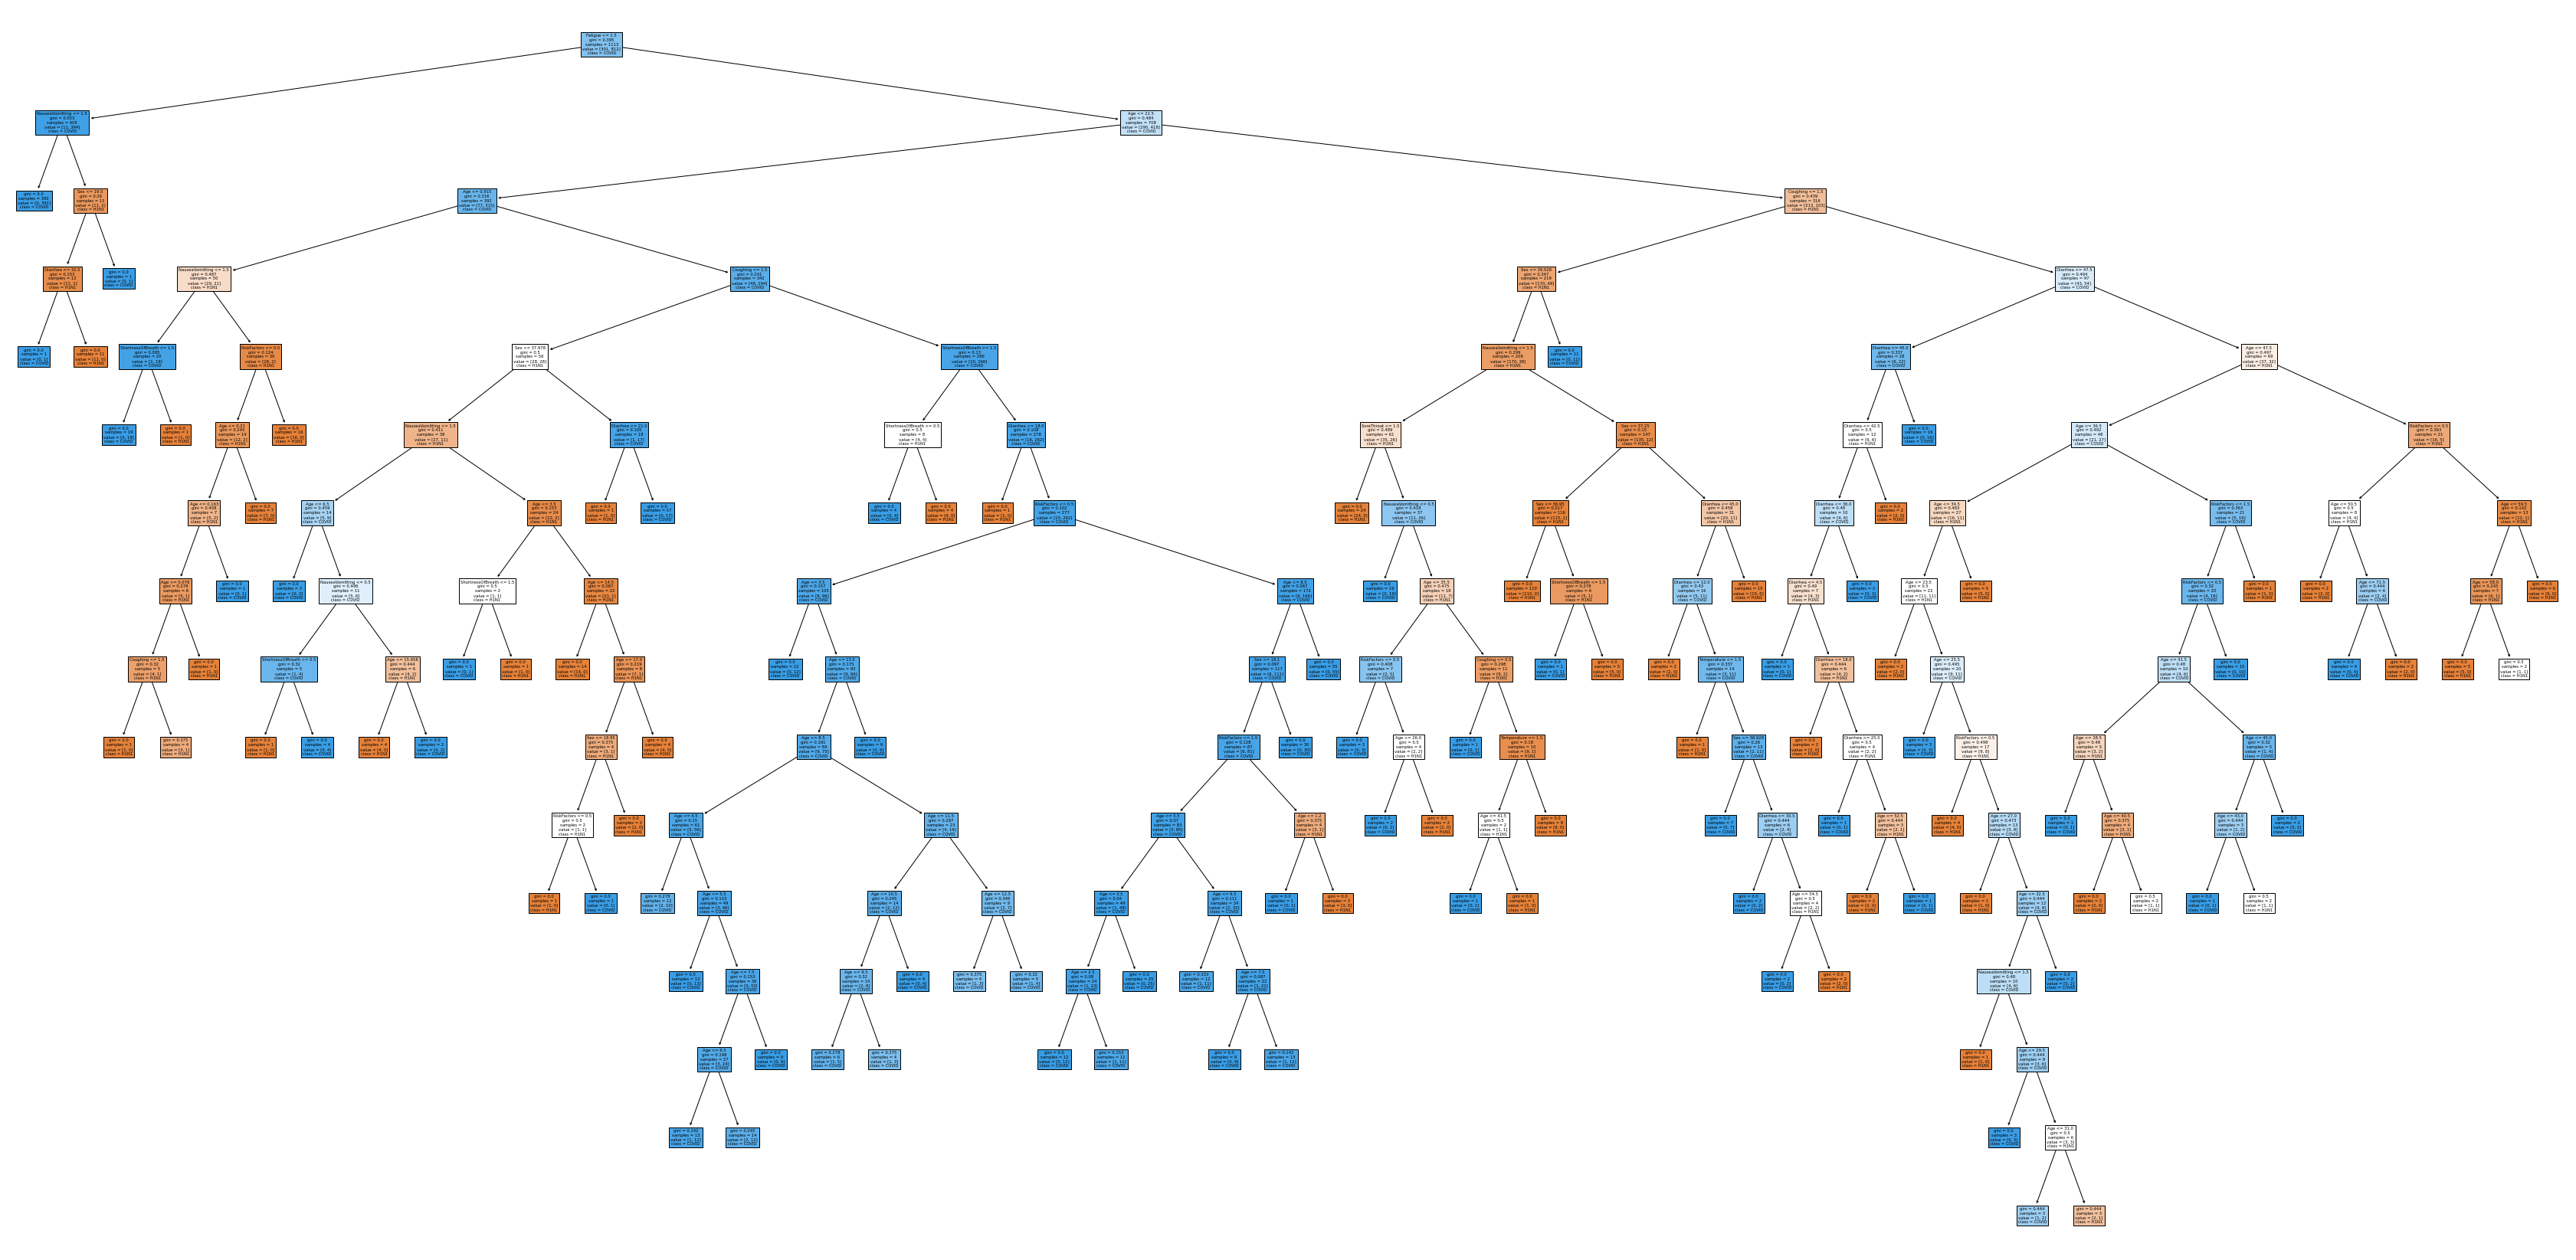

In [21]:
a = timer()
dt = DecisionTreeClassifier(criterion = "gini")
b = timer()

dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [22]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print(delta)
print(delta1)

9.27899998259818e-05
0.005530519000103595


In [23]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.8763440860215054


In [24]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  85
TP  241
FN  19
FP  27
[[ 85  27]
 [ 19 241]]


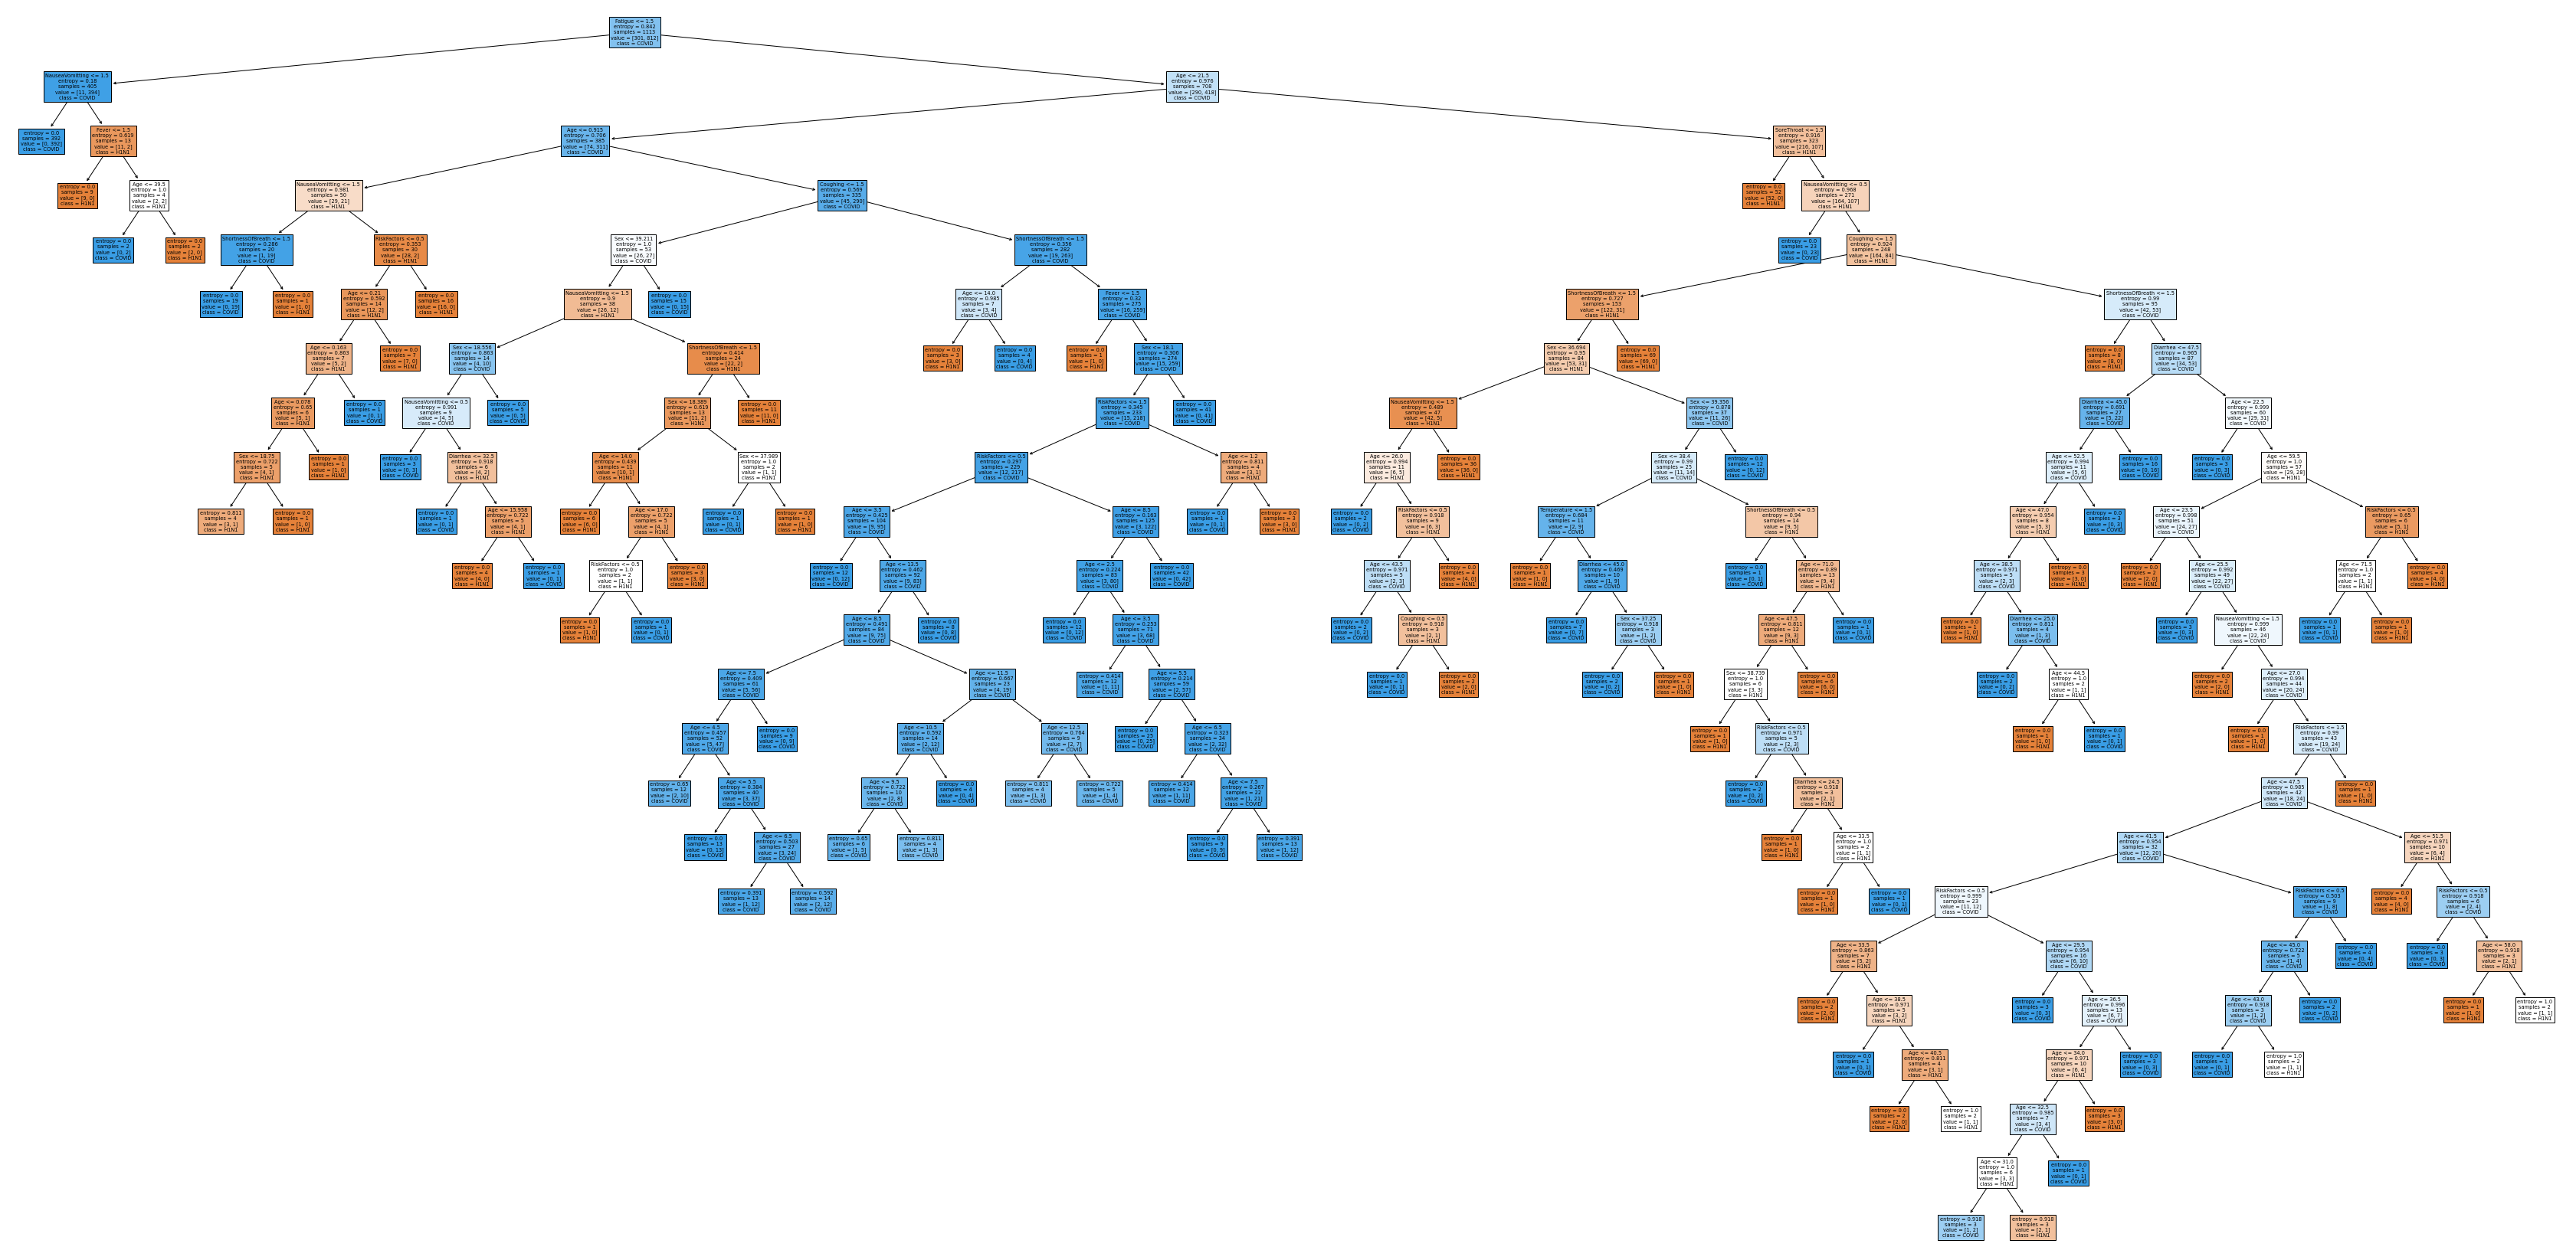

In [25]:
a = timer()
dt = DecisionTreeClassifier(criterion = "entropy")
b = timer()

dt.fit(x_train, y_train)

plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = x.columns,class_names=['H1N1', "COVID"],filled=True);

In [26]:
c = timer()
y_test_pred = dt.predict(x_test)
d = timer()

delta = b - a
delta1 = d - c

print(delta)
print(delta1)

9.260399997401692e-05
0.0034474440001304174


In [27]:
print("Accuracy Score-Train: ",accuracy_score(y_test, y_test_pred))

Accuracy Score-Train:  0.9032258064516129


In [28]:
results = confusion_matrix(y_test, y_test_pred)
print('TN ' ,results[0][0])
print('TP ' ,results[1][1])
print('FN ' ,results[1][0])
print('FP ' ,results[0][1])
print(results)

TN  95
TP  241
FN  19
FP  17
[[ 95  17]
 [ 19 241]]


In [29]:
dt.tree_.node_count

213